In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

import os
os.chdir("/content/gdrive/My Drive/112_2_LATIA/week3_030524/") # 切換目錄
import pandas as pd

csv_file = './112_student.csv'
df = pd.read_csv(csv_file) # 讀取csv檔案
print(df.head(), '\n')

Mounted at /content/gdrive/
   學年度  學校代碼    學校名稱 日間∕進修別   等級別    總計   男生計   女生計  一年級男  一年級女  ...  五年級男  \
0  112     1  國立政治大學    D 日  D 博士   921   517   404    86    69  ...    63   
1  112     1  國立政治大學    D 日  M 碩士  4231  1835  2396   598   809  ...     2   
2  112     1  國立政治大學    N 職  M 碩士  1903   938   965   262   304  ...    77   
3  112     1  國立政治大學    D 日  B 學士  9763  3928  5835   906  1349  ...     0   
4  112     2  國立清華大學    D 日  D 博士  1636  1131   505   206    93  ...   140   

   五年級女  六年級男  六年級女  七年級男  七年級女  延修生男  延修生女    縣市名稱   體系別  
0    52    68    37    66    50     0     0  30 臺北市  1 一般  
1     1     1     0     0     0     0     0  30 臺北市  1 一般  
2    57     0     0     0     0     0     0  30 臺北市  1 一般  
3     0     0     0     0     0   316   499  30 臺北市  1 一般  
4    60   110    50   115    56     0     0  18 新竹市  1 一般  

[5 rows x 26 columns] 



In [4]:
#日職進修各有多少
df01_0=list(df['日間∕進修別'].unique())
df01_1=df['日間∕進修別'].value_counts()
for i in df01_0:
  print(f"{i}:{df01_1[i]}")

D 日:448
N 職:120
P 進:30
N 修:166


In [5]:
#列出校人口超過15000
#順便取出新生和學生總數
import numpy as np
df02=df['學校名稱'].drop_duplicates()
total_students=np.zeros(len(df02),dtype=int)
new_students=total_students.copy()

tmpName=df['學校名稱'][0]
tmp=0
tmp2=0
j=0
def examine():
  global tmpName,tmp,tmp2,j
  if tmp>=15000:
    print(tmpName)
  total_students[j]=tmp
  new_students[j]=tmp2
  j+=1
  tmp=df['總計'][i]
  tmp2=df['一年級男'][i]+df['一年級女'][i]
  tmpName=df['學校名稱'][i]

for i in range(len(df)):
  if df['學校名稱'][i]==tmpName:
    tmp+=df['總計'][i]
    tmp2+=df['一年級男'][i]+df['一年級女'][i]
  else:
    examine()

examine()

國立政治大學
國立清華大學
國立臺灣大學
國立臺灣師範大學
國立成功大學
國立中興大學
國立陽明交通大學
國立臺中科技大學
國立高雄科技大學
東海大學
輔仁大學
東吳大學
中原大學
淡江大學
中國文化大學
逢甲大學
銘傳大學
正修科技大學


Correlation coefficient: 0.9817497943392279


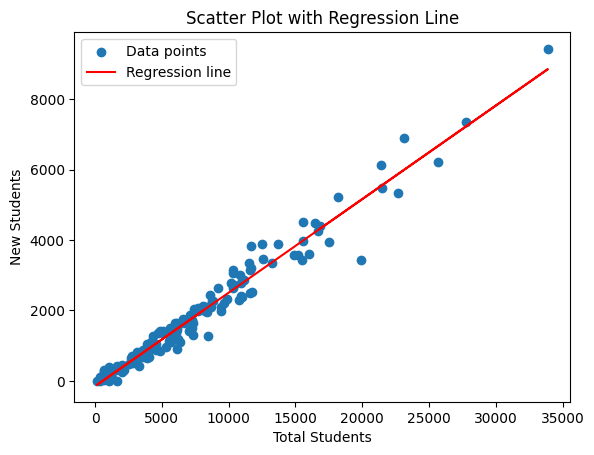

In [6]:
#畫新生和學生總數關係圖，並做線性回歸分析
def plot_regression():
    global total_students, new_students
    corr_coef = np.corrcoef(total_students, new_students)[0, 1]
    print(f"Correlation coefficient: {corr_coef}")

    coefficients = np.polyfit(total_students, new_students, 1)
    regression_line = np.polyval(coefficients, total_students)
    plt.scatter(total_students, new_students, label='Data points')

    # Plot the regression line
    plt.plot(total_students, regression_line, color='red', label='Regression line')

    plt.xlabel('Total Students')
    plt.ylabel('New Students')
    plt.title('Scatter Plot with Regression Line')

    plt.legend()
    plt.show()
plot_regression()